In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# extract the list of dates
dates = os.listdir('../data/S&S data/')

# create empty list
csv_names = []

# loop through the dates
for date in dates:
    
    # find all the files for that date
    files = os.listdir(f'../data/S&S data/{date}')
    
    # loop through the files of that date
    for file in files:
        
        # add each file to the list of file names
        csv_names.append(file)
        
        
# check how many csvs there are
print(len(csv_names))

# check first and last 5    
csv_names[:5] + csv_names[-5:]



1428


['2021-11-avon-and-somerset-stop-and-search.csv',
 '2021-11-bedfordshire-stop-and-search.csv',
 '2021-11-btp-stop-and-search.csv',
 '2021-11-cambridgeshire-stop-and-search.csv',
 '2021-11-cheshire-stop-and-search.csv',
 '2024-10-thames-valley-stop-and-search.csv',
 '2024-10-warwickshire-stop-and-search.csv',
 '2024-10-west-mercia-stop-and-search.csv',
 '2024-10-west-midlands-stop-and-search.csv',
 '2024-10-west-yorkshire-stop-and-search.csv']

In [3]:
# initialise empty dictionary
dataframes = {}

# loop all the csvs
for csv in csv_names:
    
    # add each csv to the dictionary
    dataframes[csv] = pd.read_csv(f'../data/S&S data/{csv[0:7]}/{csv}')
    
    # add the name of the police dept to the csv
    dataframes[csv]['Police department'] = '_'.join(csv.split('-')[2:-3])



In [10]:
# create one large dataframe
uk_stop_and_search_df = pd.concat(dataframes.values(), ignore_index=True)

# view the df
display(uk_stop_and_search_df)

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Police department
0,Person and Vehicle search,2021-11-01T00:30:00+00:00,NaN,NaN,NaN,NaN,Male,10-17,White - Any other White background,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,False,False,avon_and_somerset
1,Person and Vehicle search,2021-11-01T00:30:00+00:00,NaN,NaN,NaN,NaN,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False,avon_and_somerset
2,Person and Vehicle search,2021-11-01T00:39:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False,avon_and_somerset
3,Person and Vehicle search,2021-11-01T00:40:00+00:00,NaN,NaN,51.145372,-2.971081,Male,25-34,Other ethnic group - Not stated,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,avon_and_somerset
4,Person and Vehicle search,2021-11-01T00:50:00+00:00,NaN,NaN,50.895645,-2.751280,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Offensive weapons,Arrest,True,False,avon_and_somerset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421359,Person search,2024-10-31T21:52:00+00:00,False,NaN,53.603923,-1.792019,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Fireworks,A no further action disposal,True,False,west_yorkshire
1421360,Person search,2024-10-31T22:00:00+00:00,False,NaN,53.780870,-1.525739,Male,10-17,White - Any other White background,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,True,False,west_yorkshire
1421361,Person search,2024-10-31T22:00:00+00:00,False,NaN,53.780870,-1.525739,Male,10-17,White - Any other White background,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,True,False,west_yorkshire
1421362,Person search,2024-10-31T22:40:00+00:00,False,NaN,53.684563,-1.843859,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,True,False,west_yorkshire


In [11]:
cols_to_be_encoded = ['Gender', 'Age range', 'Self-defined ethnicity', 'Officer-defined ethnicity', 
                      'Legislation', 'Object of search', 'Outcome', 'Police department']

file_path = '../data/category_mapping.txt'


with open(file_path, 'w') as f:

    for col in cols_to_be_encoded:

        uk_stop_and_search_df[f'{col}_encoded'] = uk_stop_and_search_df[col].astype('category').cat.codes


        category_mapping = dict(enumerate(uk_stop_and_search_df[col].astype('category').cat.categories))




        f.write(f'{col}:\n')
        for key, value in category_mapping.items():
            f.write(f"{key}: {value}\n")
        f.write("\n")


# make time and date into separate columns
uk_stop_and_search_df[['Date', 'Time']] = uk_stop_and_search_df['Date'].str.split('T', expand=True)
uk_stop_and_search_df['Time'] = uk_stop_and_search_df['Time'].str.split('+').str[0]

# drop the bad columns
uk_stop_and_search_df = uk_stop_and_search_df.drop(columns=['Part of a policing operation', 'Policing operation'])



display(uk_stop_and_search_df)

,Type,Date,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,...,Police department,Gender_encoded,Age range_encoded,Self-defined ethnicity_encoded,Officer-defined ethnicity_encoded,Legislation_encoded,Object of search_encoded,Outcome_encoded,Police department_encoded,Time
0,Person and Vehicle search,2021-11-01,NaN,NaN,Male,10-17,White - Any other White background,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,...,avon_and_somerset,1,0,15,4,12,14,0,0,00:30:00
1,Person and Vehicle search,2021-11-01,NaN,NaN,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,...,avon_and_somerset,1,0,16,4,12,14,0,0,00:30:00
2,Person and Vehicle search,2021-11-01,NaN,NaN,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,...,avon_and_somerset,1,1,16,4,12,14,0,0,00:39:00
3,Person and Vehicle search,2021-11-01,51.145372,-2.971081,Male,25-34,Other ethnic group - Not stated,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,...,avon_and_somerset,1,2,14,-1,10,4,1,0,00:40:00
4,Person and Vehicle search,2021-11-01,50.895645,-2.751280,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Offensive weapons,...,avon_and_somerset,1,0,16,4,10,14,1,0,00:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421359,Person search,2024-10-31,53.603923,-1.792019,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Fireworks,...,west_yorkshire,1,1,16,4,12,11,0,39,21:52:00
1421360,Person search,2024-10-31,53.780870,-1.525739,Male,10-17,White - Any other White background,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,...,west_yorkshire,1,0,15,4,12,1,0,39,22:00:00
1421361,Person search,2024-10-31,53.780870,-1.525739,Male,10-17,White - Any other White background,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,...,west_yorkshire,1,0,15,4,12,1,0,39,22:00:00
1421362,Person search,2024-10-31,53.684563,-1.843859,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,...,west_yorkshire,1,0,16,4,12,14,0,39,22:40:00


In [28]:
uk_stop_and_search_df.to_csv(f'../data/uk_stop_and_search.csv')

1421364
1236234


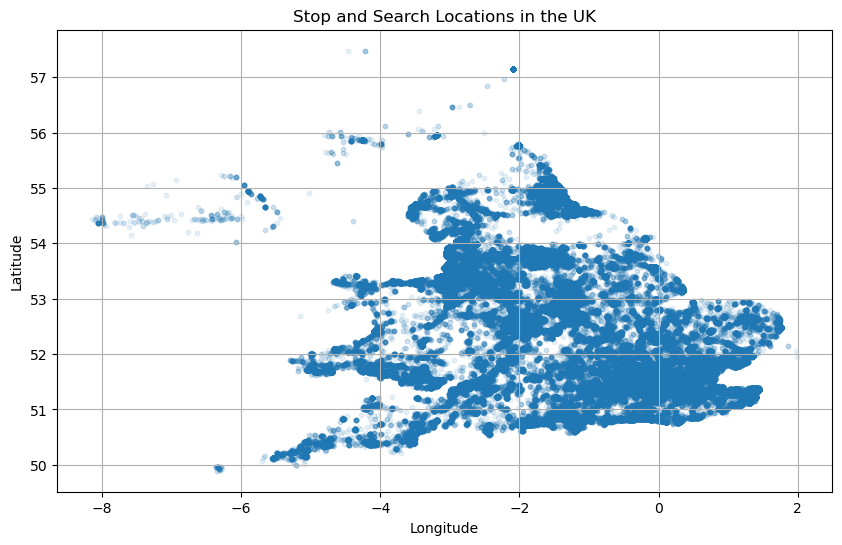

In [7]:

plot_data = uk_stop_and_search_df[['Latitude', 'Longitude', 'Police department_encoded']]

print(len(plot_data))
plot_data = plot_data.dropna()
print(len(plot_data))



# Scatter plot of Latitude and Longitude
plt.figure(figsize=(10, 6))
plt.scatter(plot_data['Longitude'], plot_data['Latitude'], s=10, alpha=0.1)
plt.title("Stop and Search Locations in the UK")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


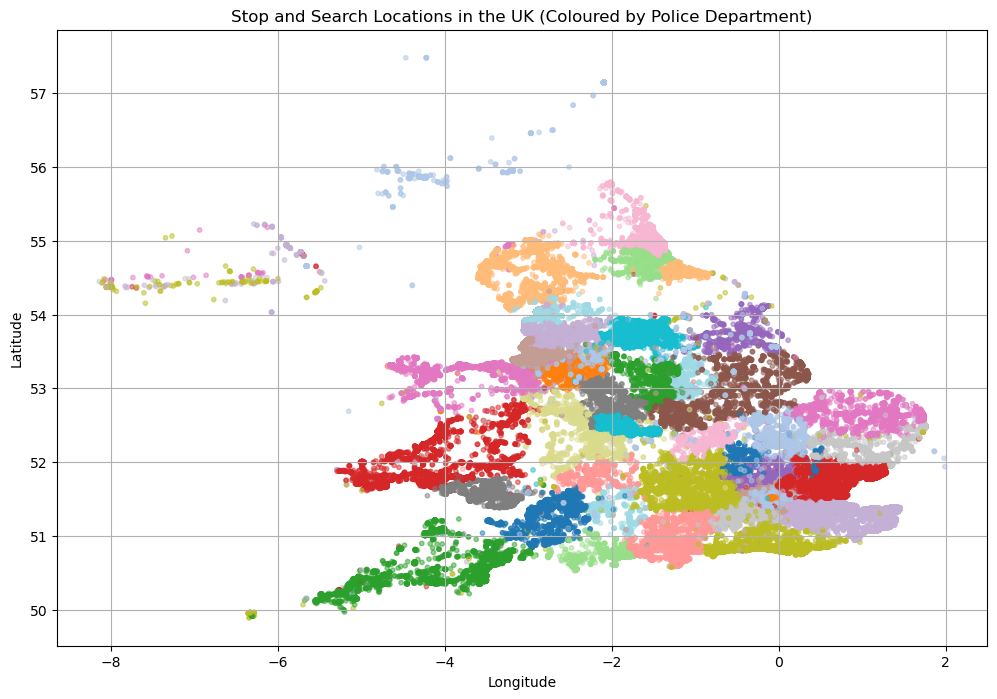

In [8]:


# # Filter required data
# plot_data = uk_stop_and_search_df[['Latitude', 'Longitude', 'Police department_encoded']]
# plot_data = plot_data.dropna()


# # Generate unique colours for each department
# police_departments = plot_data['Police department_encoded'].unique()
# num_departments = len(police_departments)

# # Generate a colour map (using a colormap or Seaborn palette)
# colour_palette = plt.cm.get_cmap('tab20', num_departments)  # Get tab20 colormap with enough colours
# colour_map = {dept: colour_palette(i) for i, dept in enumerate(police_departments)}

# # Assign colours to the data
# plot_data['colour'] = plot_data['Police department_encoded'].map(colour_map)

# # Extract colour values as a list
# plot_colours = plot_data['colour'].tolist()

# # Scatter plot
# plt.figure(figsize=(12, 8))
# plt.scatter(
#     plot_data['Longitude'], 
#     plot_data['Latitude'], 
#     c=plot_colours,  # Pass the list of colours
#     s=10, 
#     alpha=0.5
# )

# plt.title("Stop and Search Locations in the UK (Coloured by Police Department)")
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.grid(True)
# plt.show()
